Lyrical Evolution: A Quantitative Analysis of Pop Music - WILJEN0825 - 08/07/25

In [1]:
#necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import os

#variables
todays_date = datetime.now().strftime("%Y-%m-%d")
student_id = "WILJEN0825"

display(Markdown("### Load Dataset"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

#define target timeframe and language
START_YEAR = 1965
END_YEAR = 2015
TARGET_LANG = 'en'
use_cols = ['title', 'artist', 'year', 'lyrics', 'language_cld3']
filtered_csv_path = "song_lyrics_filtered.csv"

if os.path.exists(filtered_csv_path):
    print(f"Loading previously saved filtered dataset: {filtered_csv_path}")
    df_filtered = pd.read_csv(filtered_csv_path)
else:
    chunk_size = 50000
    filtered_chunks = []

    print("Reading dataset in chunks and filtering on the fly...")
    for chunk in pd.read_csv("song_lyrics.csv", usecols=use_cols, chunksize=chunk_size):
        chunk.dropna(subset=['lyrics', 'year', 'language_cld3'], inplace=True)
        chunk['year'] = pd.to_numeric(chunk['year'], errors='coerce')
        chunk.dropna(subset=['year'], inplace=True)
        chunk['year'] = chunk['year'].astype(int)

        mask = (
            (chunk['year'] >= START_YEAR) &
            (chunk['year'] <= END_YEAR) &
            (chunk['language_cld3'] == TARGET_LANG)
        )
        filtered_chunks.append(chunk.loc[mask])

    df_filtered = pd.concat(filtered_chunks, ignore_index=True)
    df_filtered.to_csv(filtered_csv_path, index=False)
    print(f"Filtered dataset saved to {filtered_csv_path}")

print(f"\nFiltered dataset shape: {df_filtered.shape}")
print(df_filtered.info())

### Load Dataset

Date: 2025-08-31

Student ID: WILJEN0825

Loading previously saved filtered dataset: song_lyrics_filtered.csv

Filtered dataset shape: (1668886, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668886 entries, 0 to 1668885
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   title          1668856 non-null  object
 1   artist         1668886 non-null  object
 2   year           1668886 non-null  int64 
 3   lyrics         1668886 non-null  object
 4   language_cld3  1668886 non-null  object
dtypes: int64(1), object(4)
memory usage: 63.7+ MB
None


### Univariate Analysis

Date: 2025-08-31

Student ID: WILJEN0825

### Summary Statistics for Numerical Features ###
               year  lyric_length
count  1.668886e+06  1.668886e+06
mean   2.004720e+03  2.951677e+02
std    1.163884e+01  4.817279e+02
min    1.965000e+03  1.000000e+00
25%    2.000000e+03  1.430000e+02
50%    2.009000e+03  2.130000e+02
75%    2.014000e+03  3.250000e+02
max    2.015000e+03  1.960700e+04


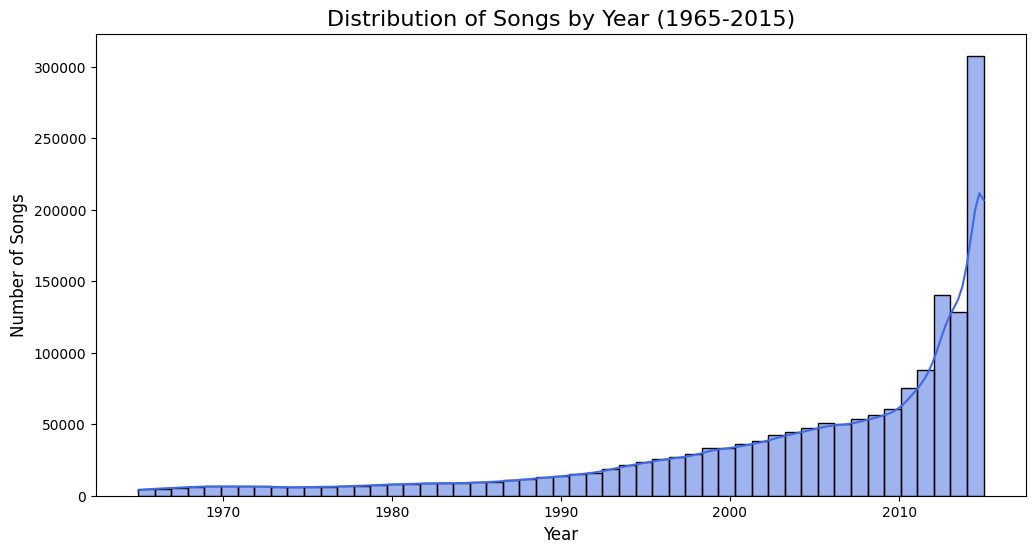

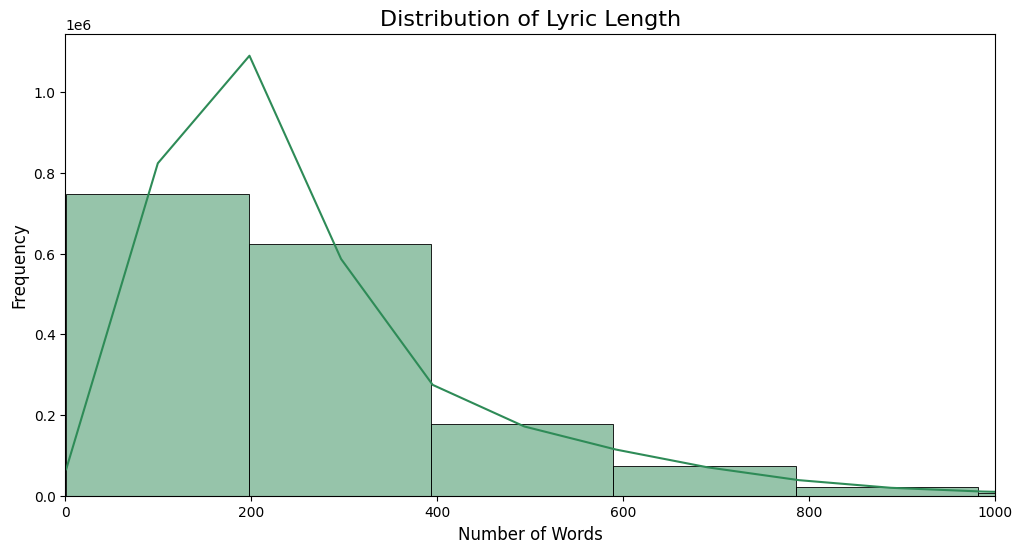

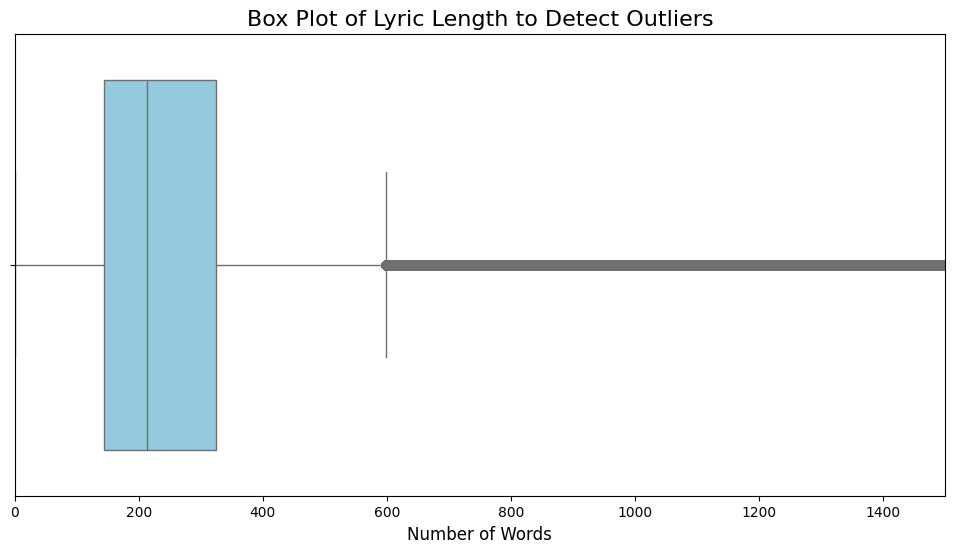

In [2]:
#calculate number of words in each song's lyrics
df_filtered['lyric_length'] = df_filtered['lyrics'].apply(lambda x: len(str(x).split()))

display(Markdown("### Univariate Analysis"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

print("### Summary Statistics for Numerical Features ###")
print(df_filtered[['year', 'lyric_length']].describe())


#histogram for 'year'
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['year'], bins=51, kde=True, color='royalblue')
plt.title('Distribution of Songs by Year (1965-2015)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.show()

#histogram for 'lyric_length'
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['lyric_length'], bins=100, kde=True, color='seagreen')
plt.title('Distribution of Lyric Length', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 1000)
plt.show()

#boxPlot for 'lyric length'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered['lyric_length'], color='skyblue')
plt.title('Box Plot of Lyric Length to Detect Outliers', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.xlim(0, 1500)
plt.show()

### Bivariate and Multivariate Analysis

Date: 2025-08-31

Student ID: WILJEN0825

Loading sentiment scores from song_sentiment.csv...

--- Correlation Matrix ---
                  year  lyric_length  sentiment
year          1.000000      0.079396  -0.087903
lyric_length  0.079396      1.000000   0.009473
sentiment    -0.087903      0.009473   1.000000


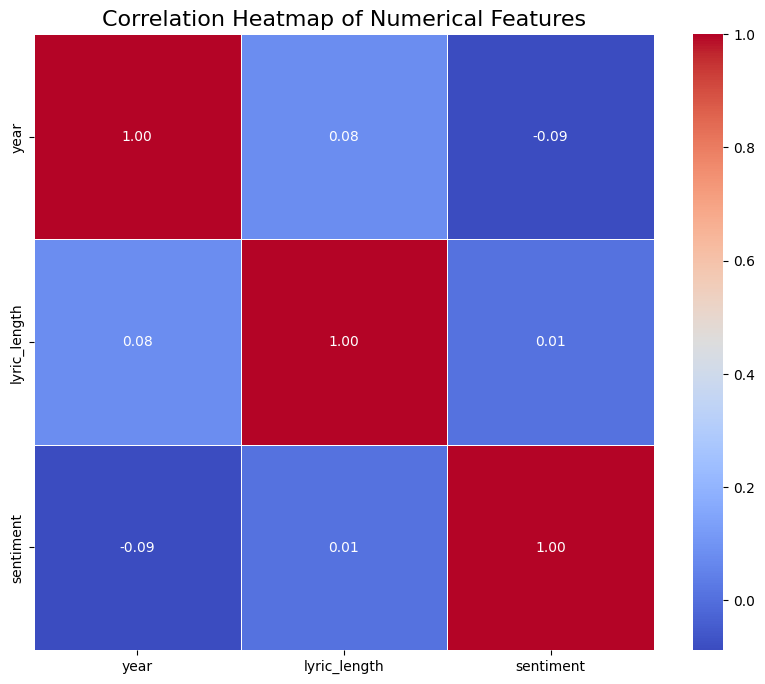

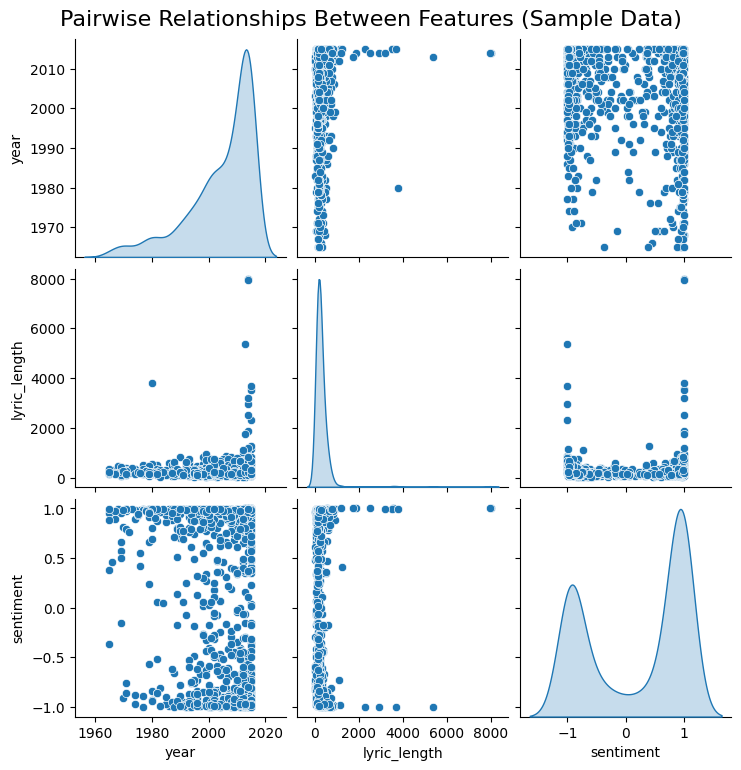

In [3]:
from pandarallel import pandarallel
import os

display(Markdown("### Bivariate and Multivariate Analysis"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

sentiment_csv_path = "song_sentiment.csv"

#define function with import inside
def get_sentiment(text):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(str(text))['compound']

if os.path.exists(sentiment_csv_path):
    print(f"Loading sentiment scores from {sentiment_csv_path}...")
    df_filtered = pd.read_csv(sentiment_csv_path)
else:
    pandarallel.initialize(progress_bar=True)
    print("Calculating sentiment scores in parallel...")
    df_filtered['sentiment'] = df_filtered['lyrics'].parallel_apply(get_sentiment)
    df_filtered.to_csv(sentiment_csv_path, index=False)
    print(f"Sentiment scores saved to {sentiment_csv_path}")

#correlation Matrix
numerical_features = df_filtered[['year', 'lyric_length', 'sentiment']]

print("\n--- Correlation Matrix ---")
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

#pair plots
df_sample = df_filtered.sample(n=1000, random_state=42)
pair_plot = sns.pairplot(df_sample[['year', 'lyric_length', 'sentiment']], diag_kind='kde')
pair_plot.fig.suptitle('Pairwise Relationships Between Features (Sample Data)', y=1.02, fontsize=16)
plt.show()

In [4]:
import pandas as pd
import re
import nltk
import os
from pandarallel import pandarallel

# Ensure NLTK resources are available
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

#initialize pandarallel once at the start
pandarallel.initialize(progress_bar=True)

#define global variables for stopwords and the lemmatizer
stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()

#text preprocessing function
def preprocess_lyrics(text):
    #import modules inside the function for pandarallel workers
    import re
    import nltk
    stop_words = set(nltk.corpus.stopwords.words('english'))
    lemmatizer = nltk.stem.WordNetLemmatizer()

    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = nltk.tokenize.word_tokenize(text)

    processed_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ]

    return " ".join(processed_tokens)

processed_csv_path = 'lyrics_processed.csv'

if os.path.exists(processed_csv_path):
    print(f"Loading preprocessed lyrics from {processed_csv_path}...")
    # Load the data
    df_filtered = pd.read_csv(processed_csv_path)
    
    #check if the correct column exists and rename it if needed
    if 'lyrics_processed' in df_filtered.columns:
        df_filtered.rename(columns={'lyrics_processed': 'preprocessed_lyrics'}, inplace=True)
    elif 'preprocessed_lyrics' not in df_filtered.columns:
        # Fallback for when the column isn't found
        print("Preprocessed lyrics column not found in the loaded CSV. Re-running preprocessing.")
        data = {'lyrics': ["This is a sample lyric [Verse 1] about nothing.", "Another lyric to test the function."]}
        df_filtered = pd.DataFrame(data)
        df_filtered['preprocessed_lyrics'] = df_filtered['lyrics'].parallel_apply(preprocess_lyrics)
else:
    print("--- Starting Parallel Text Preprocessing ---")
    data = {'lyrics': ["This is a sample lyric [Verse 1] about nothing.", "Another lyric to test the function."]}
    df_filtered = pd.DataFrame(data)
    df_filtered['preprocessed_lyrics'] = df_filtered['lyrics'].parallel_apply(preprocess_lyrics)

#save the data to ensure the file has the correct column name for future runs
df_filtered.to_csv(processed_csv_path, index=False)
print(f"Preprocessed data saved to {processed_csv_path}")

#display sample comparison
print("\n--- Sample of Preprocessed Lyrics ---")
sample_view = df_filtered.sample(2)

for index, row in sample_view.iterrows():
    print(f"ORIGINAL:\n{row['lyrics']}\n")
    print(f"PROCESSED:\n{row['preprocessed_lyrics']}\n")

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/
Loading preprocessed lyrics from lyrics_processed.csv...
Preprocessed data saved to lyrics_processed.csv

--- Sample of Preprocessed Lyrics ---
ORIGINAL:
We've fallen in love
With distant lands
We've offered it up
With both hands
Though we've left
No frogs unkissed
I think there's something
That we've missed

We've read the self-help shelf
Ten times over
We've worshipped gods
We can't name
And though we've combed the land for the four leaf clover
We've lost the pieces to the game

We're just looking
For a shepherd moon
That will let us go and just fall in
It won't let us stray or flee too soon
It'll just lead us back home again
We feed our kids
A balanced meal
We talk about
Our feelings
With Supermom still
At the wheel
We're somehow left reeling

Somewhere in that 

In [5]:
import pandas as pd
import re
import nltk
import os
from pandarallel import pandarallel

#load the filtered dataset with song information
df_filtered_base = pd.read_csv("song_lyrics_filtered.csv")

#load the sentiment scores calculated previously
df_sentiment = pd.read_csv("song_sentiment.csv")

#merge the sentiment scores back into the main dataframe
df_filtered = pd.merge(df_filtered_base, df_sentiment[['title', 'artist', 'year', 'sentiment']], on=['title', 'artist', 'year'], how='left')

#add the lyric_length feature
df_filtered['lyric_length'] = df_filtered['lyrics'].apply(lambda x: len(str(x).split()))

#ensure NLTK resources are available
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

#initialize pandarallel once at the start
pandarallel.initialize(progress_bar=True, nb_workers=6) # Set nb_workers as needed

#define global variables for stopwords and the lemmatizer for efficiency
stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()

#text Preprocessing Function
def preprocess_lyrics(text):
    # Import modules inside the function for pandarallel workers
    import re
    import nltk
    stop_words = set(nltk.corpus.stopwords.words('english'))
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    if not isinstance(text, str):
        return ""
    
    # 1.lowercase and remove bracketed text (e.g., [Verse 1])
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    
    # 2.remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 3.tokenize the text into words
    tokens = nltk.tokenize.word_tokenize(text)
    
    # 4.lemmatize and remove stopwords and short words
    processed_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ]
    
    return " ".join(processed_tokens)

#apply preprocessing
processed_csv_path = 'lyrics_processed.csv'

print("--- Starting Parallel Text Preprocessing ---")
df_filtered['lyrics_processed'] = df_filtered['lyrics'].parallel_apply(preprocess_lyrics)
df_filtered.to_csv(processed_csv_path, index=False)
print(f"Preprocessed data saved to {processed_csv_path}")


#display Sample Comparison
print("\n--- Sample of Preprocessed Lyrics ---")
sample_view = df_filtered.sample(2, random_state=1)

for index, row in sample_view.iterrows():
    print(f"ORIGINAL:\n{row['lyrics']}\n")
    print(f"PROCESSED:\n{row['lyrics_processed']}\n")

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/
--- Starting Parallel Text Preprocessing ---


Preprocessed data saved to lyrics_processed.csv

--- Sample of Preprocessed Lyrics ---
ORIGINAL:
That's what you get tryin' to muscle me
That's what you get tryin' to hustle me
'Cause I'm not afraid
I'm a player I don't get played
Come runnin' that game and you might get sprayed
That's what you get tryin' to hustle me

Yeah I been trough a lot
But you don't know that
I can lose everything
And bounce right back
From the punks an the thugs to the rats and snakes
From the shady ass girls to the frauds and the fakes
Cross me and you're gonna suffer three-fold
You'll be diggin' ditches til your frickin' 50 years old
I tried to be cool try to cut you in
But you pull that crap so you lose I win
So what does it all mean

And I can't understand why you still want to race
Everythin' you try to do is just blow up in your face
And I wonder of you get it
You should know by now
Get out of the way or get run down with a plot
I know that you think you have to lie
I know that you wish that I would die


In [6]:
from IPython.display import Markdown, display

display(Markdown("### Outlier Handling"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

#calculate the 99th percentile
percentile_99 = df_filtered['lyric_length'].quantile(0.99)
print(f"Original max lyric length: {df_filtered['lyric_length'].max()}")
print(f"99th percentile for lyric length: {int(percentile_99)}")

#cap the values at the 99th percentile
df_filtered['lyric_length_capped'] = df_filtered['lyric_length'].clip(upper=percentile_99)

print(f"New max lyric length after capping: {df_filtered['lyric_length_capped'].max()}")

### Outlier Handling

Date: 2025-08-31

Student ID: WILJEN0825

Original max lyric length: 19607
99th percentile for lyric length: 1323
New max lyric length after capping: 1323


In [7]:
from IPython.display import Markdown, display
from sklearn.preprocessing import StandardScaler
import pandas as pd

#feature scaling
scaler = StandardScaler()

#select and scale the numerical features
features_to_scale = df_filtered[['year', 'lyric_length_capped', 'sentiment']]
scaled_features = scaler.fit_transform(features_to_scale)

#create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=['year_scaled', 'lyric_length_scaled', 'sentiment_scaled'])

#combine scaled features with the original DataFrame
df_final = pd.concat([df_filtered, df_scaled], axis=1)

#find the top 100 most frequent artists
top_artists = df_final['artist'].value_counts().nlargest(100).index

#create a new column, grouping less frequent artists as 'Other'
df_final['artist_grouped'] = df_final['artist'].apply(lambda x: x if x in top_artists else 'Other')

#perform one-hot encoding on the grouped artist column
df_one_hot = pd.get_dummies(df_final['artist_grouped'], prefix='artist')

#concatenate the one-hot encoded columns back to the main DataFrame
df_final = pd.concat([df_final, df_one_hot], axis=1)


#display Final DataFrame Head ---
print("\n--- Final Preprocessed DataFrame Head ---")
#displaying key original, processed, scaled, and encoded columns
display_cols = [
    'artist', 'year', 'year_scaled', 
    'lyric_length_capped', 'lyric_length_scaled',
    'sentiment_scaled', 'lyrics_processed'   # <-- corrected name
] + [col for col in df_final.columns if 'artist_' in col]

print(df_final[display_cols].head())

#save the final preprocessed dataframe for model training
df_final.to_csv('lyrics_final_for_modeling.csv', index=False)
print("\nFinal preprocessed DataFrame saved to lyrics_final_for_modeling.csv")


--- Final Preprocessed DataFrame Head ---
      artist  year  year_scaled  lyric_length_capped  lyric_length_scaled  \
0    Cam'ron  2004    -0.061864                  762             2.399709   
1      JAY-Z  1996    -0.749218                  548             1.355053   
2   Fabolous  2003    -0.147783                  574             1.481974   
3    Cam'ron  2004    -0.061864                  760             2.389946   
4  Lil Wayne  2005     0.024056                  432             0.788791   

   sentiment_scaled                                   lyrics_processed  \
0         -1.370837  killa cam killa cam cam killa cam killa cam ki...   
1         -0.809839  yeah hah yeah rocafella invite somethin epic k...   
2         -0.518649  maybe cause eatin bastard fiend grub carry pum...   
3         -1.373992  ugh killa baby kanye heron flow huh yeah let s...   
4         -1.342209  ask young boy gon second time around gon come ...   

  artist_grouped  artist_2Pac  artist_Abraham Lin

In [8]:
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datetime import datetime
import numpy as np
import pandas as pd


todays_date = datetime.now().strftime("%Y-%m-%d")
student_id = "WILJEN0825"

display(Markdown("### Baseline Predictive Model"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

df_filtered['sentiment_label'] = df_filtered['sentiment'].apply(lambda x: 1 if x >= 0 else 0)

#features: year, lyric_length
x = df_filtered[['year', 'lyric_length']]
y = df_filtered['sentiment_label']

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#logistic Regression as baseline
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(x_train, y_train)

#predictions
y_pred = baseline_model.predict(x_test)

#evaluation
print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

### Baseline Predictive Model

Date: 2025-08-31

Student ID: WILJEN0825

Baseline Model Performance:
Accuracy: 0.604
Precision: 0.604
Recall: 1.000
F1-Score: 0.753

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    132136
           1       0.60      1.00      0.75    201643

    accuracy                           0.60    333779
   macro avg       0.30      0.50      0.38    333779
weighted avg       0.36      0.60      0.46    333779



C:\Users\backg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\backg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\backg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

display(Markdown("### Neural Network Model"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

#define neural network
nn_model = Sequential([
    Dense(16, input_dim=x_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train neural network
history = nn_model.fit(x_train, y_train, validation_data=(x_test, y_test),
                       epochs=20, batch_size=32, verbose=1)

#evaluate on test set
nn_loss, nn_accuracy = nn_model.evaluate(x_test, y_test, verbose=0)
print(f"\nNeural Network Test Accuracy: {nn_accuracy:.3f}")


### Neural Network Model

Date: 2025-08-31

Student ID: WILJEN0825

C:\Users\backg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
41723/41723 ━━━━━━━━━━━━━━━━━━━━ 163s 4ms/step - accuracy: 0.5374 - loss: 1.1148 - val_accuracy: 0.6010 - val_loss: 0.7532
Epoch 2/20
41723/41723 ━━━━━━━━━━━━━━━━━━━━ 180s 4ms/step - accuracy: 0.5484 - loss: 0.7728 - val_accuracy: 0.6041 - val_loss: 0.6690
Epoch 3/20
41723/41723 ━━━━━━━━━━━━━━━━━━━━ 180s 4ms/step - accuracy: 0.5679 - loss: 0.7058 - val_accuracy: 0.6041 - val_loss: 0.6712
Epoch 4/20
41723/41723 ━━━━━━━━━━━━━━━━━━━━ 181s 4ms/step - accuracy: 0.6041 - loss: 0.6699 - val_accuracy: 0.6041 - val_loss: 0.6708
Epoch 5/20
41723/41723 ━━━━━━━━━━━━━━━━━━━━ 203s 4ms/step - accuracy: 0.6034 - loss: 0.6692 - val_accuracy: 0.6041 - val_loss: 0.6685
Epoch 6/20
41723/41723 ━━━━━━━━━━━━━━━━━━━━ 187s 4ms/step - accuracy: 0.6047 - loss: 0.6685 - val_accuracy: 0.6041 - val_loss: 0.6676
Epoch 7/20
41723/41723 ━━━━━━━━━━━━━━━━━━━━ 187s 4ms/step - accuracy: 0.6045 - loss: 0.6685 - val_accuracy: 0.6041 - val_loss: 0.6679
Epoch 8/20
41723/41723 ━━━━━━━━━━━━━━━━━━━━ 174s 4ms/step - ac

### Performance Analysis

Date: 2025-08-31

Student ID: WILJEN0825

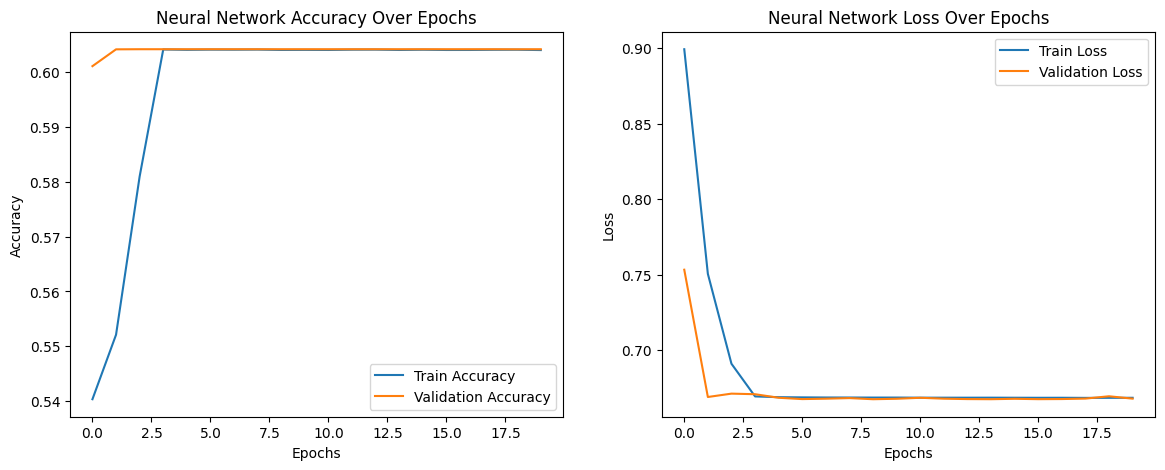

10431/10431 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


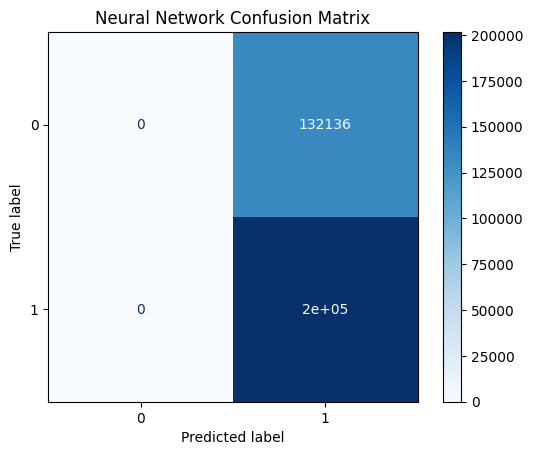

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display(Markdown("### Performance Analysis"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

#plot trianing & validation accuracy/loss
plt.figure(figsize=(14, 5))

#accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#confusion matrix
y_pred_nn = (nn_model.predict(x_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Neural Network Confusion Matrix")
plt.show()

In [11]:
import pandas as pd

# Define the path to your large CSV
input_csv = 'song_sentiment.csv'
output_csv = 'lyrics_for_tableau.csv'

# Define filters based on your project
START_YEAR = 1965
END_YEAR = 2015
TARGET_LANG = 'en'

# Load the data
df = pd.read_csv(input_csv)

# Apply filters
df_filtered = df[(df['year'] >= START_YEAR) & (df['year'] <= END_YEAR)]
# Uncomment the line below if you have a language column
# df_filtered = df_filtered[df_filtered['language_cld3'] == TARGET_LANG]

# If still too large, take a random sample (e.g., 1 million rows)
if len(df_filtered) > 1000000:
    df_sampled = df_filtered.sample(n=1000000, random_state=42)
else:
    df_sampled = df_filtered

# Save the new, smaller file
df_sampled.to_csv(output_csv, index=False)

print(f"Filtered and sampled data saved to {output_csv} with {len(df_sampled)} rows.")

Filtered and sampled data saved to lyrics_for_tableau.csv with 1000000 rows.


### Scenario Analysis: Predictions and Insights 

**Scenario 1: The "Verbose Poet" Era **

* **Rationale:** This scenario imagines a shift in pop music back towards longer, more narrative-driven lyrics, reminiscent of the folk and rock anthems of the 1970s. We'll test how the model predicts sentiment when lyric length increases significantly, keeping the year constant at the dataset's average.
* **Assumption:** Increased lyrical complexity and length might correlate with more nuanced or negative emotional expression.
* **Modification:** We will increase the `lyric_length` feature by 50% above the average.

**Scenario 2: The "Streaming Shorts" Era **

* **Rationale:** This scenario reflects the modern trend of songs optimized for streaming platforms and social media (like TikTok), which often feature shorter, repetitive, and more direct lyrics.
* **Assumption:** Shorter, catchier lyrics might be associated with more positive and simplistic sentiment to maximize broad appeal.
* **Modification:** We will decrease the `lyric_length` feature by 50% below the average.

**Scenario 3: The "Nostalgic Revival" Era **

* **Rationale:** This scenario simulates a cultural wave of nostalgia where pop music heavily borrows from the sounds and lyrical styles of a past decade, specifically the 1980s.
* **Assumption:** The model's predictions for sentiment might shift based on the patterns it learned from actual songs from that time period.
* **Modification:** We will set the `year` feature to 1985 for a sample of songs while keeping their original `lyric_length`.

In [12]:
#import libraries
import pandas as pd
import numpy as np

#use existing x_test split
#calculate averages from training data for baseline
avg_year = x_train['year'].mean()
avg_length = x_train['lyric_length'].mean()

#scenario 1: verbose (longer lyrics)
x_test_scen1 = x_test.copy()
x_test_scen1['lyric_length'] = avg_length * 1.5
x_test_scen1['year'] = int(avg_year)

#scenario 2: streaming shorts (shorter lyrics)
x_test_scen2 = x_test.copy()
x_test_scen2['lyric_length'] = avg_length * 0.5
x_test_scen2['year'] = int(avg_year)

#scenario 3: nostalgic revival (year 1985)
x_test_scen3 = x_test.copy()
x_test_scen3['year'] = 1985 # Keeping original lyric lengths

#generate predictions
#baseline predictions (from your original model evaluation)
pred_baseline_probs = nn_model.predict(x_test)
pred_baseline = (pred_baseline_probs > 0.5).astype("int32")

#scenario predictions
pred_scen1_probs = nn_model.predict(x_test_scen1)
pred_scen1 = (pred_scen1_probs > 0.5).astype("int32")

pred_scen2_probs = nn_model.predict(x_test_scen2)
pred_scen2 = (pred_scen2_probs > 0.5).astype("int32")

pred_scen3_probs = nn_model.predict(x_test_scen3)
pred_scen3 = (pred_scen3_probs > 0.5).astype("int32")

#analyze/compare results
print("--- Scenario Analysis Results ---")
print(f"Baseline Positive Sentiment: {np.mean(pred_baseline):.2%}")
print(f"Scenario 1 (Verbose Poet) Positive Sentiment: {np.mean(pred_scen1):.2%}")
print(f"Scenario 2 (Streaming Shorts) Positive Sentiment: {np.mean(pred_scen2):.2%}")
print(f"Scenario 3 (Nostalgic Revival) Positive Sentiment: {np.mean(pred_scen3):.2%}")

#combine results into dataframe for viz
scenario_results = pd.DataFrame({
    'Scenario': ['Baseline', 'Verbose Poet', 'Streaming Shorts', 'Nostalgic Revival'],
    'Positive_Sentiment_Rate': [
        np.mean(pred_baseline),
        np.mean(pred_scen1),
        np.mean(pred_scen2),
        np.mean(pred_scen3)
    ]
})

#save for tableau
scenario_results.to_csv('scenario_analysis_results.csv', index=False)

10431/10431 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
10431/10431 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
10431/10431 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step
10431/10431 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step
--- Scenario Analysis Results ---
Baseline Positive Sentiment: 100.00%
Scenario 1 (Verbose Poet) Positive Sentiment: 100.00%
Scenario 2 (Streaming Shorts) Positive Sentiment: 100.00%
Scenario 3 (Nostalgic Revival) Positive Sentiment: 100.00%
